# Wrangle and Analyze Data

#### By Mariam Alabkari

<hr>

## Introduction

In [43]:
# import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# Gathering data

### Twitter Archive

In [2]:
# load twitter archive file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# print names of columns
twitter_archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# count number of missing values in each column
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
# check for duplicated rows
twitter_archive_df['tweet_id'].duplicated().any()

False

In [24]:
# count number of duplicated rows
sum(twitter_archive_df.duplicated())

0

In [34]:
#sum the number of duplicated rows for tweet_id
sum(twitter_archive_df['tweet_id'].duplicated())

0

In [44]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
# count nunique values
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [36]:
twitter_archive_df['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Pippin       1
Ivar         1
Olaf         1
Tater        1
Rumpole      1
Name: name, Length: 957, dtype: int64

In [40]:
# count ratings with decimal numbers 
twitter_archive_df[twitter_archive_df['text'].str.contains(r'(\d+\.\d+\/\d+)')].count()

tweet_id                      6
in_reply_to_status_id         1
in_reply_to_user_id           1
timestamp                     6
source                        6
text                          6
retweeted_status_id           1
retweeted_status_user_id      1
retweeted_status_timestamp    1
expanded_urls                 5
rating_numerator              6
rating_denominator            6
name                          6
doggo                         6
floofer                       6
pupper                        6
puppo                         6
dtype: int64

In [51]:
# check for duplicated tweet id
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [53]:
# check for duplicated tweet id
twitter_archive_df[twitter_archive_df.source.duplicated()].count()

tweet_id                      2352
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2352
source                        2352
text                          2352
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2293
rating_numerator              2352
rating_denominator            2352
name                          2352
doggo                         2352
floofer                       2352
pupper                        2352
puppo                         2352
dtype: int64

### Image Prediction

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = 'image-predictions.csv'
with open(filename, 'wb') as f:
        f.write(response.content)

In [5]:
image_predictions_df = pd.read_csv('image-predictions.csv', sep='\t')

In [25]:
# print names of columns
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [9]:
# print first five rows
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
# count number of missing values in each column
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
# count number of duplicated rows
sum(image_predictions_df.duplicated())

0

In [46]:
image_predictions_df['tweet_id'].duplicated().any()

False

In [58]:
image_predictions_df['jpg_url'].duplicated().any()

True

In [60]:
# count number of duplicated rows
sum(image_predictions_df.jpg_url.duplicated())

66

In [30]:
# count nunique values
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [47]:
image_predictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [54]:
# sample 1
Image(url = 'https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg')

> The list of the images contains some of non-dogs images as shown above.

In [55]:
# sample 2
Image(url = 'https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg')

### Twitter API

In [ ]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 

In [ ]:
# Testing functionality
test = api.get_status(892420643555336193, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
test != "" # Check

### Load the tweets
> In this step, I will get the tweets form Twitter archive dataset by their ID number. Then I will store the tweets in the lists based on the results (found or not found)

In [ ]:
# Copying the tweet ids of the archvie to a list, iterating through it
tweet_ids = []
tweet_ids = df_twitter_archive.tweet_id.copy()

# Creating a list, to put to the tweets in (as JSON-objects)
tweets_json_lake = []

In [ ]:
# Measuring elapsed time for retrieving information from the Twitter API.
start_time_twitter_api = time.time()

# Iterating through all tweet ids to retrieve the entire post as an object.
for tweet_id in tweet_ids:
    # Using the try-and-except method to handle non-existing tweet_ids: Cases where no information can be obtained.   
    try:
        # Using the get_status function of tweepy to retrieve the post, including the retweeted and favorite counts.
        tweet_status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        # Appending the tweet (as a json-object to the list of tweets)
        tweets_json_lake.append(tweet_status._json)
        # Empyting variable for the next iteration
        tweet_status = ""
        #print(str(tweet_id)) #Can be used to monitor
    except:
        print("Retrieving information of tweet ID " + str(tweet_id) + " failed.")

### Write into json file

> In this step, I will store the tweets that in the found list as a json file

In [ ]:
# Creating or opening the file tweets_json.text in write mode, to put the list of tweets into.
with open ('input_raw_data/tweet_json.txt', 'w') as outfile:
    json.dump(tweets_json_lake, outfile)
    
print("Tweet information stored to file.")
#Stop timing
end_time_twitter_api = time.time()
print("Elapsed time for retrieving tweet information: " + str(end_time_twitter_api - start_time_twitter_api) + "seconds.")

In [ ]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive_df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [ ]:
# print the results of each list
print("The list of tweets" ,len(list_of_tweets))
print("The list of no found tweets" , len(cant_find_tweets_for_those_ids))

### Read json file

In [6]:
# read json file
tweet_json_df = pd.read_json('tweet_json.txt', lines = True)

In [12]:
tweet_json_df.shape

(2339, 32)

In [26]:
# print names of columns
tweet_json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [13]:
# print first ten rows
tweet_json_df.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [7]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2339 non-null   datetime64[ns, UTC]
 1   id                             2339 non-null   int64              
 2   id_str                         2339 non-null   int64              
 3   full_text                      2339 non-null   object             
 4   truncated                      2339 non-null   bool               
 5   display_text_range             2339 non-null   object             
 6   entities                       2339 non-null   object             
 7   extended_entities              2065 non-null   object             
 8   source                         2339 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [31]:
tweet_json_df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.339000e+03,2.339000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2339.000000,2339.000000,2203.0,2203.0,2.600000e+01,2.600000e+01
mean,7.421620e+17,7.421620e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2900.236853,7893.802907,0.0,0.0,8.113972e+17,8.113972e+17
std,6.828729e+16,6.828729e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4890.438478,12233.739104,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783378e+17,6.783378e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,583.000000,1368.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.186133e+17,7.186133e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1353.000000,3435.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986907e+17,7.986907e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3380.000000,9668.000000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,82894.000000,162992.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [49]:
# check for duplicated rows
tweet_json_df['id'].duplicated().sum()

0

In [45]:
tweet_json_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 274
source                              0
in_reply_to_status_id            2262
in_reply_to_status_id_str        2262
in_reply_to_user_id              2262
in_reply_to_user_id_str          2262
in_reply_to_screen_name          2262
user                                0
geo                              2339
coordinates                      2339
place                            2338
contributors                     2339
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                136
possibly_sensitive_appealable     136
lang        

## Cleaning datasets

In [62]:
# Make a copy of the datasets before cleaning
twitter_archive_df = twitter_archive_df.copy()
image_predictions_df = image_predictions_df.copy()
tweet_json_df = tweet_json_df.copy()

## Quality Issues

##### Define: Rename column id to be able to combine the datasets 

In [64]:
# rename the column 
tweet_json_df.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [66]:
# test 
tweet_json_df.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


##### Define: Convert the timestamp column form object to datetime format

In [87]:
# change data type
dataset['timestamp'] = pd.to_datetime(datasets['timestamp'])
dataset['date'] = dataset['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
dataset['time'] = dataset['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [88]:
# test
dataset.dtypes

tweet_id                                 int64
in_reply_to_status_id_x                float64
in_reply_to_user_id_x                  float64
timestamp                  datetime64[ns, UTC]
source_x                                object
                                  ...         
quoted_status_id_str                   float64
quoted_status_permalink                 object
quoted_status                           object
date                                    object
time                                    object
Length: 61, dtype: object

##### Define: Drop duplicated rows for jpg_url column

In [89]:
# drop duplicated rows
dataset = dataset.drop_duplicates(subset=['jpg_url'], keep='last')

In [118]:
# test
sum(dataset.jpg_url.duplicated())

0

##### Define: Remove the columns that contains too many null values

In [95]:
# removing columns
dataset.drop(['in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
              'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'quoted_status_id',
              'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status', 'in_reply_to_status_id_x',
              'in_reply_to_user_id_x', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
              ], axis=1, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [134]:
# test
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2065
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2005 non-null   int64              
 1   timestamp                      1941 non-null   datetime64[ns, UTC]
 2   text                           2005 non-null   object             
 3   expanded_urls                  2005 non-null   object             
 4   rating_numerator               2005 non-null   int64              
 5   rating_denominator             2005 non-null   int64              
 6   name                           2005 non-null   object             
 7   jpg_url                        2005 non-null   object             
 8   img_num                        2005 non-null   int64              
 9   p1                             2005 non-null   object             
 10  p1_conf                 

##### Define:  Combine source x and source y in one column

In [103]:
dataset['source'] = dataset[['source_x', 'source_y']].apply(lambda x: ''.join(x), axis=1) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
# delete source_x and source_y from the dataset
dataset.drop(['source_x','source_y'], axis=1, inplace= True)

In [109]:
# test
dataset.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'id_str',
       'full_text', 'truncated', 'display_text_range', 'entities',
       'extended_entities', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'date',
       'time', 'source'],
      dtype='object')

##### Define: Replace  the values in source column with readable texts

In [129]:
dataset['source'] = dataset['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">,Twitter for iPhone</a>', 'Twitter for iPhone')
dataset['source'] = dataset['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter web client')
dataset['source'] = dataset['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','tweetDeck')
dataset['source'] = dataset['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')

In [135]:
# test
dataset.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,date,time,source,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,37750,False,False,0.0,0.0,en,08-01-2017,16:23,Twitter for iPhoneTwitter for iPhone,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,32434,False,False,0.0,0.0,en,08-01-2017,00:17,Twitter for iPhoneTwitter for iPhone,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,24430,False,False,0.0,0.0,en,07-31-2017,00:18,Twitter for iPhoneTwitter for iPhone,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,41088,False,False,0.0,0.0,en,07-30-2017,15:58,Twitter for iPhoneTwitter for iPhone,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,39282,False,False,0.0,0.0,en,07-29-2017,16:00,Twitter for iPhoneTwitter for iPhone,None


##### Define: Change the names of the columns to convenient names

In [150]:
dataset.rename(columns={'p1':'first_prediction_algorithm', 'p1_conf':'first_confidence_95%','p1_dog':'first_dog_predaction',
                       'p2':'second_prediction_algorithm', 'p2_conf':'second_confidence_95%','p2_dog':'second_dog_predaction',
                       'p3':'third_prediction_algorithm', 'p3_conf':'third_confidence_95%','p3_dog':'third_dog_predaction'},
              inplace = True)

In [152]:
# test
dataset.head(0)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction_algorithm,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,date,time,source,dog_stages


##### Define: Delete unnecessary columns

In [153]:
dataset = dataset.drop(['expanded_urls'], 1)

In [154]:
# test
dataset.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num',
       'first_prediction_algorithm', 'first_confidence_95%',
       'first_dog_predaction', 'second_prediction_algorithm',
       'second_confidence_95%', 'second_dog_predaction',
       'third_prediction_algorithm', 'third_confidence_95%',
       'third_dog_predaction', 'created_at', 'id_str', 'full_text',
       'truncated', 'display_text_range', 'entities', 'extended_entities',
       'user', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'date', 'time', 'source',
       'dog_stages'],
      dtype='object')

##### Define: Clean decimal values in rating numerators

In [155]:
ratings = dataset.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings


,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2061,5,10
2062,6,10
2063,9,10
2064,7,10


In [158]:
dataset['rating_numerator'] = ratings[0]

In [160]:
# test
dataset[dataset.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction_algorithm,first_confidence_95%,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,date,time,source,dog_stages
40,883482846933004288,2017-07-11 00:00:02+00:00,This is Bella. She hopes her smile made you sm...,13.5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,...,44777,False,False,0.0,0.0,en,07-11-2017,00:00,Twitter for iPhoneTwitter for iPhone,None
552,786709082849828864,2016-12-01 19:56:00+00:00,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,...,19309,False,False,0.0,0.0,en,12-01-2016,19:56,Twitter for iPhoneTwitter for iPhone,None
608,778027034220126208,2016-11-14 01:18:12+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,...,6925,False,False,0.0,0.0,en,11-14-2016,01:18,Twitter for iPhoneTwitter for iPhone,pupper
1445,680494726643068929,2016-02-08 02:18:30+00:00,Here we have uncovered an entire battalion of ...,11.26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,...,1785,False,False,0.0,0.0,en,02-08-2016,02:18,Twitter for iPhoneTwitter for iPhone,None


## Tidiness 

##### Define: Combine the three datasets together

In [81]:
# using merge function make one final dataframe 
dataset = pd.merge(twitter_archive_df, image_predictions_df, on ='tweet_id', how= 'inner' )
dataset = pd.merge(dataset, tweet_json_df, on = 'tweet_id', how = 'inner' )


In [82]:
# test
dataset.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [86]:
dataset.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source_y',
       'in_reply_to_status_id_y', 'in_reply_to_status_id_str',
       'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2066 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2066 non-null   object             
 4   source_x                       2066 non-null   object             
 5   text                           2066 non-null   object             
 6   retweeted_status_id            75 non-null     float64            
 7   retweeted_status_user_id       75 non-null     float64            
 8   retweeted_status_timestamp     75 non-null     object             
 9   expanded_urls                  2066 non-null   object             
 10  rating_numerator        

In [84]:
dataset.describe()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,...,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.066000e+03,2.300000e+01,2.300000e+01,7.500000e+01,7.500000e+01,2066.000000,2066.000000,2066.000000,2066.000000,2.066000e+03,...,2.300000e+01,0.0,0.0,0.0,2066.000000,2066.000000,2065.0,2065.0,0.0,0.0
mean,7.380806e+17,6.978112e+17,4.196984e+09,7.628386e+17,1.049949e+16,12.263795,10.513553,1.203291,0.594568,1.346716e-01,...,4.196984e+09,NaN,NaN,NaN,2773.916747,8339.131655,0.0,0.0,NaN,NaN
std,6.763392e+16,4.359384e+16,0.000000e+00,5.813066e+16,9.092825e+16,40.768770,7.192615,0.562172,0.271062,1.007233e-01,...,0.000000e+00,NaN,NaN,NaN,4832.380421,12571.992068,0.0,0.0,NaN,NaN
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,...,4.196984e+09,NaN,NaN,NaN,11.000000,0.000000,0.0,0.0,NaN,NaN
25%,6.764332e+17,6.732411e+17,4.196984e+09,7.118465e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364253,5.387868e-02,...,4.196984e+09,NaN,NaN,NaN,591.000000,1586.750000,0.0,0.0,NaN,NaN
50%,7.117137e+17,6.757073e+17,4.196984e+09,7.761133e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588030,1.184015e-01,...,4.196984e+09,NaN,NaN,NaN,1305.000000,3669.500000,0.0,0.0,NaN,NaN
75%,7.931317e+17,7.031489e+17,4.196984e+09,7.981456e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843883,1.955692e-01,...,4.196984e+09,NaN,NaN,NaN,3199.500000,10420.500000,0.0,0.0,NaN,NaN
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,...,4.196984e+09,NaN,NaN,NaN,82894.000000,162992.000000,0.0,0.0,NaN,NaN


##### Define: Combine dog stages to one column

In [111]:
# create new colum dog_stages 
dataset['dog_stages'] = dataset[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
dataset['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) 
dataset['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)
dataset['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)
dataset['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)
dataset['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [112]:
# drop doggo, floofer, pupper and puppo columns
dataset.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace= True)

In [113]:
# test
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2065
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2005 non-null   int64              
 1   timestamp                      1941 non-null   datetime64[ns, UTC]
 2   text                           2005 non-null   object             
 3   expanded_urls                  2005 non-null   object             
 4   rating_numerator               2005 non-null   int64              
 5   rating_denominator             2005 non-null   int64              
 6   name                           2005 non-null   object             
 7   jpg_url                        2005 non-null   object             
 8   img_num                        2005 non-null   int64              
 9   p1                             2005 non-null   object             
 10  p1_conf                 

## Saving dataset to CSV file

In [167]:
# Storing data as csv file
dataset.to_csv('twitter_archive_master.csv', index=False)

## Findings and visualizations

In [168]:
dataset.head(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,first_prediction_algorithm,first_confidence_95%,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,date,time,source,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,...,37750,False,False,0.0,0.0,en,08-01-2017,16:23,Twitter for iPhoneTwitter for iPhone,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,32434,False,False,0.0,0.0,en,08-01-2017,00:17,Twitter for iPhoneTwitter for iPhone,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,24430,False,False,0.0,0.0,en,07-31-2017,00:18,Twitter for iPhoneTwitter for iPhone,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,...,41088,False,False,0.0,0.0,en,07-30-2017,15:58,Twitter for iPhoneTwitter for iPhone,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,39282,False,False,0.0,0.0,en,07-29-2017,16:00,Twitter for iPhoneTwitter for iPhone,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,...,19757,False,False,0.0,0.0,en,07-29-2017,00:08,Twitter for iPhoneTwitter for iPhone,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,...,11549,False,False,0.0,0.0,en,07-28-2017,16:27,Twitter for iPhoneTwitter for iPhone,None
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,...,63690,False,False,0.0,0.0,en,07-28-2017,00:22,Twitter for iPhoneTwitter for iPhone,None
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,...,27140,False,False,0.0,0.0,en,07-27-2017,16:25,Twitter for iPhoneTwitter for iPhone,None
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,...,31134,False,False,0.0,0.0,en,07-26-2017,15:59,Twitter for iPhoneTwitter for iPhone,doggo


In [169]:
dataset.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num',
       'first_prediction_algorithm', 'first_confidence_95%',
       'first_dog_predaction', 'second_prediction_algorithm',
       'second_confidence_95%', 'second_dog_predaction',
       'third_prediction_algorithm', 'third_confidence_95%',
       'third_dog_predaction', 'created_at', 'id_str', 'full_text',
       'truncated', 'display_text_range', 'entities', 'extended_entities',
       'user', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'date', 'time', 'source',
       'dog_stages'],
      dtype='object')

In [170]:
dataset.describe()

,rating_denominator,img_num,first_confidence_95%,second_confidence_95%,third_confidence_95%,id_str,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable
count,2005.000000,2005.000000,2005.000000,2.005000e+03,2.005000e+03,2.005000e+03,2005.000000,2005.000000,2004.0,2004.0
mean,10.529177,1.202494,0.594279,1.341199e-01,6.018379e-02,7.362358e+17,2607.397007,8592.840898,0.0,0.0
std,7.300697,0.559703,0.272077,1.006077e-01,5.083420e-02,6.766598e+16,4672.089354,12676.153535,0.0,0.0
min,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,11.000000,0.000000,0.0,0.0
25%,10.000000,1.000000,0.362925,5.387110e-02,1.619070e-02,6.758531e+17,575.000000,1801.000000,0.0,0.0
50%,10.000000,1.000000,0.587830,1.170030e-01,4.947150e-02,7.088343e+17,1252.000000,3842.000000,0.0,0.0
75%,10.000000,1.000000,0.846986,1.948970e-01,9.157150e-02,7.884121e+17,2960.000000,10726.000000,0.0,0.0
max,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,82894.000000,162992.000000,0.0,0.0


#### Which type of dog has a higher number of ratings?

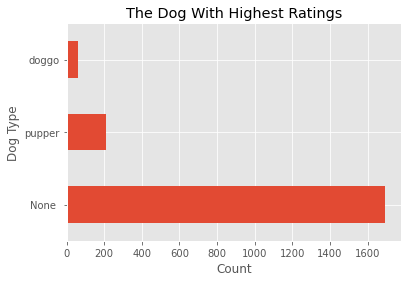

In [174]:
df_dog_type = dataset.groupby('dog_stages').filter(lambda x: len(x) >= 25)
df_dog_type['dog_stages'].value_counts().plot(kind = 'barh')
plt.title('The Dog With Highest Ratings')
plt.xlabel('Count')
plt.ylabel('Dog Type')
fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

> The above figure shows the numbers of each dog. It is clear that most of the dogs types are none. However, The pupper dogs got a higher amount of ratings than doggo dogs.

#### Which dog stage is the favorite?

In [194]:
stage_count = dataset.groupby('dog_stages').favorite_count.sum().reset_index()

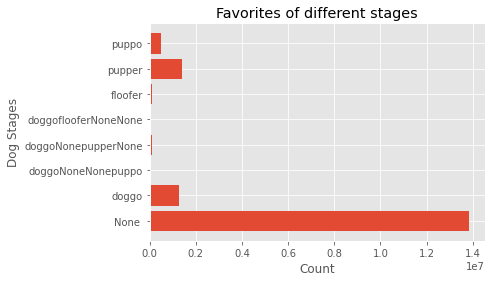

In [228]:
y_pos = np.arange(len(stage_count))

plt.barh(y_pos, stage_count.favorite_count.values)
plt.yticks(y_pos, stage_count.dog_stages)
plt.title('Favorites of different stages')
plt.xlabel('Count')
plt.ylabel('Dog Stages')
plt.show()

> From the figure it is clear that there are so many none stages. However, pupper dogs are more popular among the other types.

#### What are the top 10 retweets count?

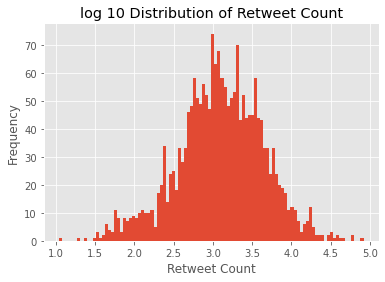

In [206]:
log_retweet = dataset['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Retweet Count')
plt.savefig('retweet_count_dist');

> From the histogram it is clear that the retweets count has a normal distribution.

#### What are the top 10 frequent dog names?

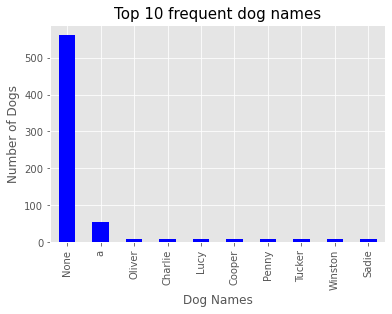

In [217]:
dataset['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar', color = 'blue')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

> From the bar chart it is clear that there are many none names. And the total number of the names are almost colse.

#### What is the relationship between the retweets and counts?

<Figure size 720x720 with 0 Axes>

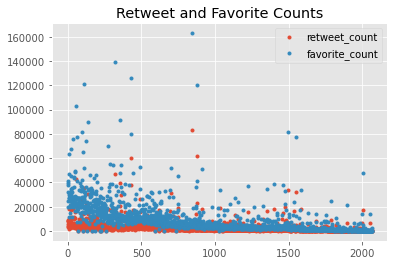

In [225]:
# plotting different realtionship between vaibles
plt.figure(figsize = (10, 10))
dataset[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');

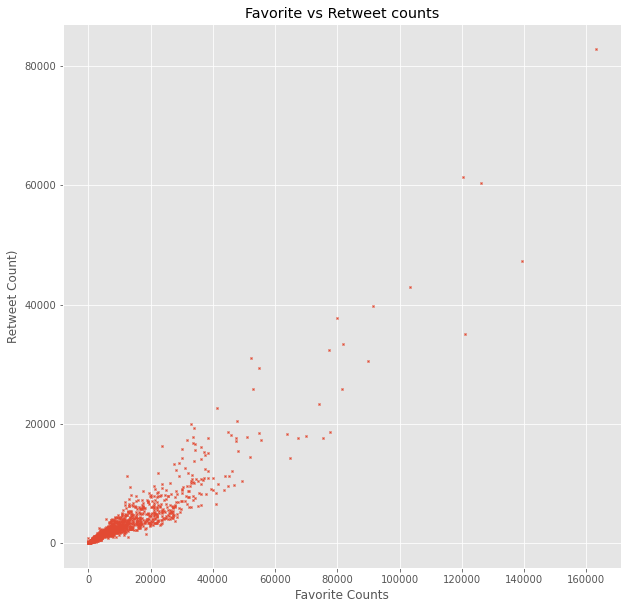

In [226]:
plt.figure(figsize = (10, 10))
plt.plot(dataset.favorite_count, dataset.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

> From the scatter plots it is clear that the tweets got more favorites than retweets.

## Summary of issues

### Quality issues:
<ul>
    <li>columns name are diffrent in the three datasets.</li>
    <li>Timestamp data type is not correct.</li>
    <li>So many columns contains too many null values.</li>
    <li>There are some values that separated into different columns.</li>
    <li>jpg_url column has some duplicated rows.</li>
    <li>Source column contains non-readable texts.</li>
    <li>Some columns contains non-convenient names</li>
    <li>There are some unnecessary columns</li>
    <li>Rating numerators column contains some decimal values.</li>
    <li>The dataset contains some non-dogs images.</li>
</ul>

</br>

### Tidiness issues:
<ul>
    <li>The need to combine the three datasets together.</li>
    <li>The need to combine dog stages to one column.</li>
</ul>